# OPTaaS Demo - Warm Start with Prior Mean from Expression

### Setup / imports

In [1]:
%matplotlib inline

from mindfoundry.optaas.client.client import OPTaaSClient, Goal
from mindfoundry.optaas.client.parameter import FloatParameter, ChoiceParameter

from utils.demo import Demo
from utils.prior_means import PriorMeansSimpleDemo

## Demonstration problems
We create two problems for demonstration purposes, one in a flat, non-conditional parameter space, and the other in a conditional parameter space.

In the flat parameter space problem, the target is one-dimensional, and is the sum of a base polynomial, which gives the global shape of the function, and a low-amplitude sin curve, which has the effect of disturbing the location of the maximum slightly. The base polynomial is later passed as a "prior mean function" in the form of an explicity expression. This allows the optimizer to disregard the vast majority of the search space, and get close to the maximum very quickly.

The conditional parameter space problem has a single binary selection parameter. Querying the first value for the selection parameter results in exactly the same target function as the flat parameter space problem, but the second value results in this same target function subtracted by 20. This information is also later passed through prior mean function to the optimizer, allowing the optimizer to focus entirely on the first selection parameter initially, where the maximum really resides.

Non conditional demonstration problem. The function that will be provided as a prior mean is shown as a dashed line:


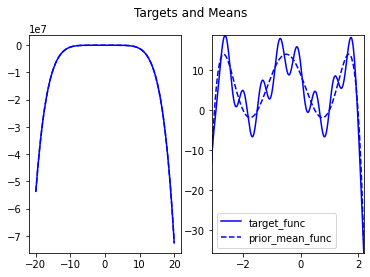

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c708720358>)

In [2]:
print("Non conditional demonstration problem. The function that will be provided as a prior mean is shown as a dashed line:")
prior_means_example = PriorMeansSimpleDemo()
prior_means_example.plot_target_against_mean(-20, 20)

Non conditional demonstration problem. The function that will be provided as a prior mean is shown as a dashed line:


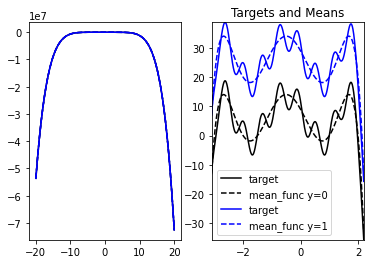

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c708848390>)

In [3]:
print("Non conditional demonstration problem. The function that will be provided as a prior mean is shown as a dashed line:")
prior_means_example = PriorMeansSimpleDemo()
prior_means_example.plot_conditional_target_against_prior_means(-20, 20)

## Connect to the OPTaaS server

In [4]:
client = OPTaaSClient("Your Optimize URL", "Your API Key")

In [5]:
x = FloatParameter(name='x', id='id_x_1', minimum=-20, maximum=20)
x_1 = FloatParameter(name='x_1', id='id_x_1', minimum=-20, maximum=20)
x_2 = FloatParameter(name='x_2', id='id_x_2', minimum=-20, maximum=20)
choice_y = ChoiceParameter(name='y', id='id_y', choices=[x_1, x_2])

parameters_simple_space = [x]

parameters_conditional_space = [choice_y]

In [6]:
initial_configurations = 1

simple_task_with_prior_mean = client.create_task(
    title='Prior Mean Optimization',
    parameters=parameters_simple_space,
    goal=Goal.max,
    prior_means=[(x + 3) * (2 - x) * (x - 1) * (x + 2) * (x - .5) * (x + 1.5)],
    initial_configurations=initial_configurations,
    random_seed=8
)

simple_task_without_prior_mean = client.create_task(
    title='Prior Mean Optimization',
    parameters=parameters_simple_space,
    goal=Goal.max,
    initial_configurations=initial_configurations,
    random_seed=8
)

In [7]:
from mindfoundry.optaas.client.expressions import PriorMeanExpression

initial_configurations = 1

prior_for_x1 = PriorMeanExpression(
    when=x_1.is_present(),
    then=(x_1 + 3) * (2 - x_1) * (x_1 - 1) * (x_1 + 2) * (x_1 - .5) * (x_1 + 1.5)
)

prior_for_x2 = PriorMeanExpression(
    when=x_2.is_present(),
    then=(x_2 + 3) * (2 - x_2) * (x_2 - 1) * (x_2 + 2) * (x_2 - .5) * (x_2 + 1.5) + 20
)

conditional_task_with_prior_mean = client.create_task(
    title='Prior Mean Optimization',
    parameters=parameters_conditional_space,
    goal=Goal.max,
    prior_means=[prior_for_x1, prior_for_x2],
    initial_configurations=initial_configurations,
    random_seed=8
)

conditional_task_without_prior_mean = client.create_task(
    title='Prior Mean Optimization',
    parameters=parameters_conditional_space,
    goal=Goal.max,
    initial_configurations=initial_configurations,
    random_seed=8
)

# Create a Simple Task and Run Optimization

## Use Prior Mean

In [8]:
configurations = simple_task_with_prior_mean.generate_configurations(initial_configurations)

demo = Demo(['x'])

display(configurations)

[{'type': 'default', 'values': {'x': 0.0}}]

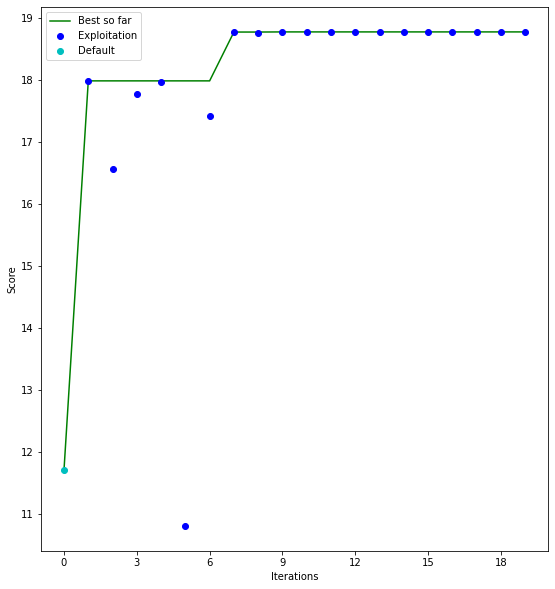

,x,Score,Configuration Type
17,-2.629218,18.7832,exploitation
16,-2.629221,18.7832,exploitation
18,-2.629217,18.7832,exploitation
19,-2.629215,18.7832,exploitation
15,-2.629224,18.7832,exploitation
14,-2.629226,18.7832,exploitation
13,-2.629232,18.7832,exploitation
12,-2.629235,18.7832,exploitation
11,-2.629248,18.7832,exploitation
10,-2.629283,18.7832,exploitation


In [9]:
number_of_iterations = 20

for i in range(number_of_iterations):
    configuration = configurations[i]
    x = configuration.values['x']
    score = prior_means_example.target({'id_x': x})

    demo.display(configuration, score, i)

    next_configuration = simple_task_with_prior_mean.record_result(configuration=configuration, score=score)
    configurations.append(next_configuration)

simple_task_with_prior_mean.complete()

## Do Not Use Prior Mean

In [10]:
configurations = simple_task_without_prior_mean.generate_configurations(initial_configurations)

demo = Demo(['x'])

display(configurations)

[{'type': 'default', 'values': {'x': 0.0}}]

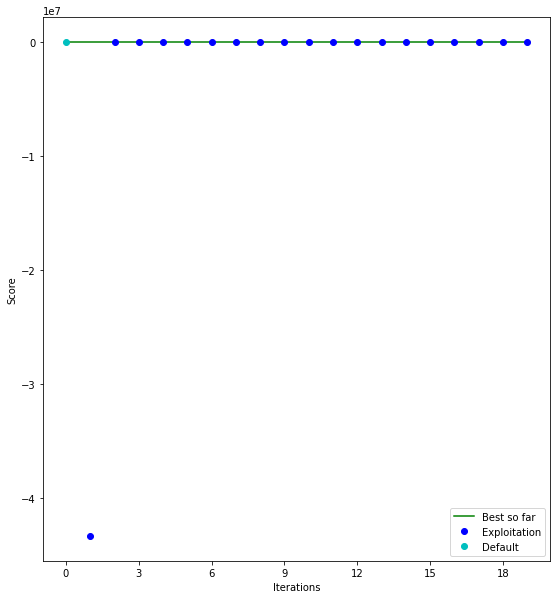

,x,Score,Configuration Type
3,-0.126888,15.9173,exploitation
4,-0.123674,15.9102,exploitation
5,-0.117723,15.8828,exploitation
6,-0.110433,15.8241,exploitation
7,-0.102355,15.7265,exploitation
8,-0.093603,15.5819,exploitation
9,-0.087468,15.4565,exploitation
10,-0.086587,15.4368,exploitation
11,-0.079477,15.2636,exploitation
12,-0.076380,15.18,exploitation


In [11]:
number_of_iterations = 20

for i in range(number_of_iterations):
    configuration = configurations[i]
    x = configuration.values['x']
    score = prior_means_example.target({'id_x': x})

    demo.display(configuration, score, i)

    next_configuration = simple_task_without_prior_mean.record_result(configuration=configuration, score=score)
    configurations.append(next_configuration)

simple_task_without_prior_mean.complete()

# Create a Conditional Task and Run Optimization

## Use Prior Mean

In [12]:
configurations = conditional_task_with_prior_mean.generate_configurations(initial_configurations)

demo = Demo(['x_1', 'x_2', 'y'])

display(configurations)

[{'type': 'default', 'values': {'y': {'x_1': 0.0}}}]

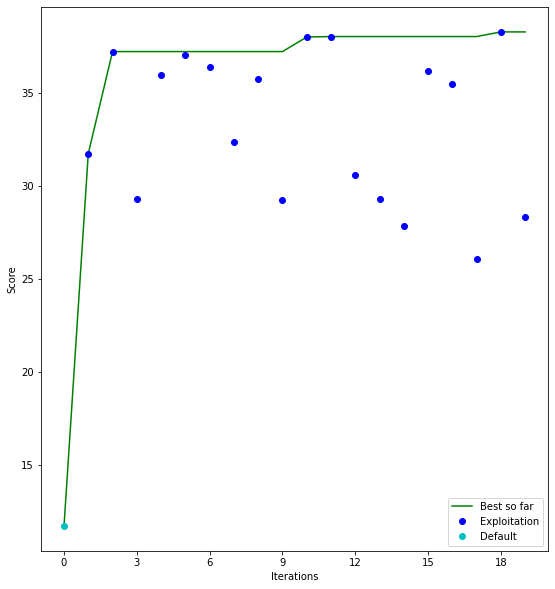

,x_1,x_2,y,Score,Configuration Type
18,None,None,1.758644,38.2544,exploitation
11,None,None,-0.710841,38.0058,exploitation
10,None,None,-0.699299,37.9785,exploitation
2,None,None,1.696855,37.1993,exploitation
5,None,None,-2.705374,37.0071,exploitation
6,None,None,-0.626977,36.3648,exploitation
15,None,None,-0.793606,36.1457,exploitation
4,None,None,-0.615797,35.9365,exploitation
8,None,None,-0.159196,35.7054,exploitation
16,None,None,-0.809117,35.4312,exploitation


In [13]:
number_of_iterations = 20

for i in range(number_of_iterations):
    configuration = configurations[i]
    if 'x_1' in configuration.values['y'].keys():
        score = prior_means_example.conditional_target({'id_x_1': configuration.values['y']['x_1'], 'id_y': 0})
    else:
        score = prior_means_example.conditional_target({'id_x_2': configuration.values['y']['x_2'], 'id_y': 1})
    demo.display(configuration, score, i)
    next_configuration = conditional_task_with_prior_mean.record_result(configuration=configuration, score=score)
    configurations.append(next_configuration)

conditional_task_with_prior_mean.complete()

## Do Not Use Prior Mean

In [14]:
configurations = conditional_task_without_prior_mean.generate_configurations(initial_configurations)

demo = Demo(['x_1', 'x_2', 'y'])

display(configurations)

[{'type': 'default', 'values': {'y': {'x_1': 0.0}}}]

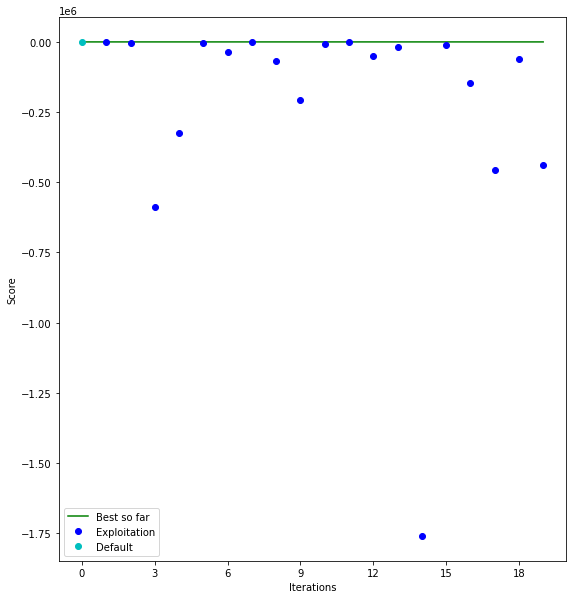

,x_1,x_2,y,Score,Configuration Type
1,None,None,0.000000,31.7201,exploitation
11,None,None,-0.454712,29.4306,exploitation
0,None,None,0.000000,11.7201,default
7,None,None,-2.024640,4.99033,exploitation
5,None,None,3.742500,-3141.53,exploitation
2,None,None,-5.027339,-5045.61,exploitation
10,None,None,-5.113011,-5795.42,exploitation
15,None,None,4.439549,-9385.37,exploitation
13,None,None,-5.866769,-16646.1,exploitation
6,None,None,5.485031,-34562.7,exploitation


In [15]:
number_of_iterations = 20

for i in range(number_of_iterations):
    configuration = configurations[i]
    if 'x_1' in configuration.values['y'].keys():
        score = prior_means_example.conditional_target({'id_x_1': configuration.values['y']['x_1'], 'id_y': 0})
    else:
        score = prior_means_example.conditional_target({'id_x_2': configuration.values['y']['x_2'], 'id_y': 1})
    demo.display(configuration, score, i)
    next_configuration = conditional_task_without_prior_mean.record_result(configuration=configuration, score=score)
    configurations.append(next_configuration)

conditional_task_without_prior_mean.complete()